1.1: Import Libraries

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string
from nltk.text import Text


1.2: Import Dataset

In [2]:
df = pd.read_csv('Twitter Hate Speech.csv')
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


1.3 : Data Information

1.3.1: How many numbers of observations and features

In [3]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


In [4]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [5]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
df.size

95886

In [8]:
# Predictor Attribute
text = df.iloc[:, 1:]
text.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [9]:
# target Attribute
label = df.iloc[:, 0:1]
label.tail()

,id
31957,31958
31958,31959
31959,31960
31960,31961
31961,31962


In [10]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [11]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


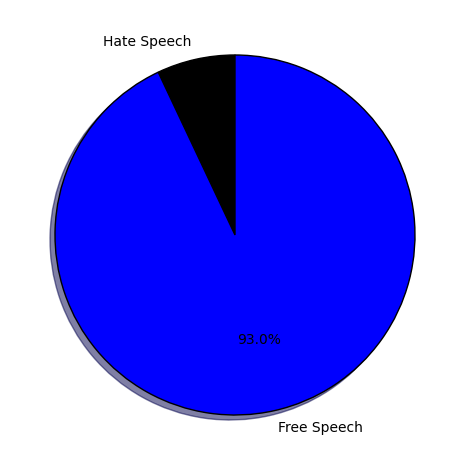

In [12]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'},
        autopct = '%1.1f%%', startangle= 90, colors=['Black', 'blue'])

plt.tight_layout()
plt.show()

PART 2 : Data Preprocessing

2.1: Text Cleaning
2.1.1: Lower Case

In [13]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

2.1.2: Remove Punctuation

In [14]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

2.1.3: Remove URLs


In [15]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

2.1.4: Removing @tags

In [16]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

2.1.5: Remove Special Characters


In [17]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special)

2.2 : Preprocessing Operations

2.2.1: Tokenizing


In [18]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [19]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if not token in stopwords.words('english')]
    word_lem = WordNetLemmatizer()
    tokens = [word_lem.lemmatize(token) for token in tokens]
    return tokens

In [21]:
def generate_wordcloud(df, label):
    text = ' '.join(df[df['label'] == label]['tweet'].apply(str))
    tokens = preprocess_text(text)
    comment_words = ' '.join(tokens)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()




In [22]:
# import TF-IDF model from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer



In [23]:
# init the TF-IDF model and take 5000 most frequent words from dictionaries
vectorizer = TfidfVectorizer(max_features= 2000)

In [24]:
# remove the list inside tweet cols which was create due to tokenization
list_to_str = []
for lists in df['tweet']:
    list_to_str.append(' '.join(map(str, lists)))

df['tweet'] = list_to_str

In [25]:
# Shape of predictor after Feature Engineering
text.shape

(31962, 2)

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
from sklearn.model_selection import train_test_split

label = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (25569, 2)
y_train shape: (25569,)
X_test shape: (6393, 2)
y_test shape: (6393,)


Building the CNN with LSTM

3.1 : Convolutional Neural Netowrk with Long Short Term Memory

3.1.1: Importing the Keras libraries and packages

In [28]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, TimeDistributed, Conv1D, ZeroPadding1D, GRU
from tensorflow.keras.layers import Lambda, Input, Dropout, Masking, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model

3.1.2: Build the Model
3.1.3: Compile the Model
3.1.4: Fit the Training Data into Model

In [29]:
import numpy as np
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def cnn_lstm(input_dim, output_dim, dropout=0.2, n_layers=1):
    dtype = 'float32'

    input_data = Input(name='the_input', shape=input_dim, dtype=dtype)

    x = Conv1D(filters=256, kernel_size=10, strides=4, name='conv_1')(input_data)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout, name='dropout_1')(x)

    x = LSTM(128, activation='relu', return_sequences=True,
             dropout=dropout, name='lstm_1')(x)
    x = LSTM(128, activation='relu', return_sequences=False,
             dropout=dropout, name='lstm_2')(x)

    x = Dense(units=64, activation='relu', name='fc')(x)
    x = Dropout(dropout, name='dropout_2')(x)

    y_pred = Dense(units=output_dim, activation='sigmoid', name='sigmoid')(x)

    network_model = Model(inputs=input_data, outputs=y_pred)

    return network_model

# Example usage
X_train = np.random.rand(100, 10)  # Example input data with shape (100, 10)
y_train = np.random.randint(0, 2, size=(100, 1))  # Example train output data with shape (100, 1)
X_test = np.random.rand(20, 10)  # Example test input data with shape (20, 10)
y_test = np.random.randint(0, 2, size=(20, 1))  # Example test output data with shape (20, 1)

model = cnn_lstm((X_train.shape[1], 1), 1)  # Reshape input shape to (10, 1)

# Print model summary
model.summary()

# Create instance of Adam optimizer
optimizer = Adam()

# Update activation function and loss function
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=25,
    validation_data=(X_test, y_test),
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 the_input (InputLayer)      [(None, 10, 1)]           0         
                                                                 
 conv_1 (Conv1D)             (None, 1, 256)            2816      
                                                                 
 batch_normalization (BatchN  (None, 1, 256)           1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1, 256)            0         
                                                                 
 dropout_1 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            197120    
                                                             

3.1.5: Predict the Train and Test Data

In [30]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

1/1 [==============================] - 0s 95ms/step


Part 4: Result Evaluation

4.1: Confusion Matrix and Evaluate result

In [31]:
from sklearn.metrics import confusion_matrix


4.1.1: Create and Visualize Confusion Matrix and calculate the result


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score


Accuracy Score: 0.6666666666666666
Precision Score: 0.6666666666666666
True positive Rate: 0.6666666666666666
False positive Rate: 0.3333333333333333
F1 Score: 0.6666666666666666
Specificity: 0.6666666666666666
Mean Absolute Error: 0.3333333333333333
ROC Area: 0.6666666666666667


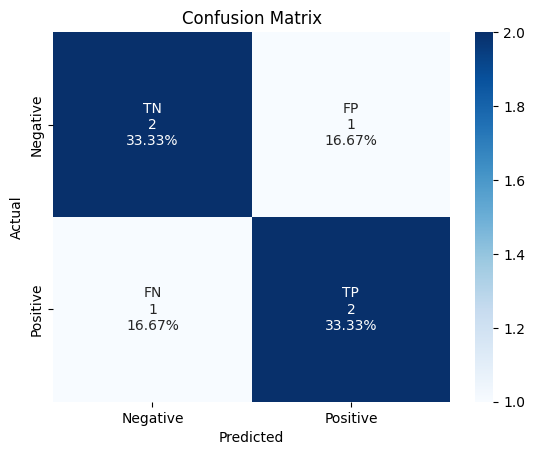

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

# Example data
y_test = np.array([0, 1, 1, 0, 1, 0])
y_pred_test = np.array([0, 0, 1, 0, 1, 1])

# Compute confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)

# Extract values from confusion matrix
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

# Accuracy Score
Accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy Score:', Accuracy)

# Precision Score
Precision = precision_score(y_test, y_pred_test)
print('Precision Score:', Precision)

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_test, y_pred_test)
print('True positive Rate:', TPR)

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate:', FPR)

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_test, y_pred_test)
print('F1 Score:', F1)

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity)

# Mean Absolute Error
Error = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', Error)

# ROC Area
Roc = roc_auc_score(y_test, y_pred_test)
print('ROC Area:', Roc)

# Visualize the Confusion Matrix
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten() / np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()


4.1.2: Visualize the Results

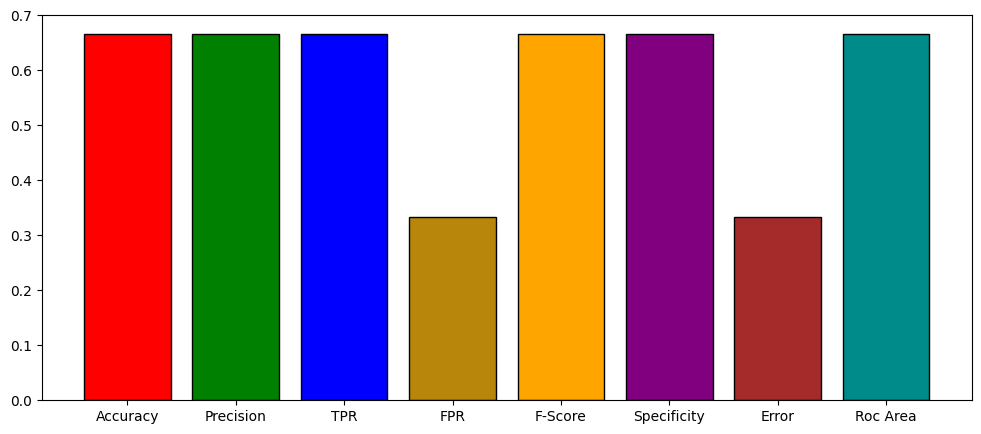

In [37]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')
plt.show()

Part 5 : Make a New Prediction

5.1: Save the TF-IDF Vectorizer and SVM Model

In [38]:
import pickle

5.1.2: Save the Vectorizer

In [39]:
TF_IDF= open("cv.pkl","wb")
pickle.dump(vectorizer,TF_IDF)
TF_IDF.close()

5.1.3: Save the model

In [40]:
cnn_lstm = open("model.pkl","wb")
pickle.dump(model,cnn_lstm)
cnn_lstm.close()

5.2: Load the Vectorizer and Model
5.2.1: Load the Vectorizer

In [41]:
cv = open("cv.pkl","rb")
cv = pickle.load(cv)
cv

TfidfVectorizer(max_features=2000)

5.2.2: Load the Model

In [42]:
model = open("model.pkl","rb")
model = pickle.load(model)

5.3: Make a new Prediction
5.3.1 hate Speech prediction example

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Positive News example
comment = ["I support racism. I don't care"]

# Convert X_train elements to strings if they are not already strings
X_train_strings = [str(x) for x in X_train]

# Fit the TF-IDF vectorizer with your training data (assuming you have a variable called `X_train_strings` that contains your training text data)
cv = TfidfVectorizer(max_features=10)  # Limit maximum features to 10
cv.fit(X_train_strings)

# Transform the comment using the fitted vectorizer
vect = cv.transform(comment).toarray()

# Reshape the vect array to match the expected input shape of the model
vect = np.expand_dims(vect, axis=-1)

# Predict the class label using the model
prediction = model.predict(vect)

# Check the prediction and print the result
if prediction == 1:
    print("free Speech")
else:
    print("hate Speech")


1/1 [==============================] - 0s 41ms/step
hate Speech


5.3.2 free Speech prediction example

In [51]:
# Positive News example
comment = ["I respect all kinds of nationalities"]

# Transform the comment using the fitted vectorizer
vect = cv.transform(comment).toarray()

# Reshape the vect array to match the expected input shape of the model
vect = np.expand_dims(vect, axis=-1)

# Predict the class label using the model
prediction = model.predict(vect)

# Check the prediction and print the result
if prediction == 1:
    print("Hate Speech")
else:
    print("Free Speech")


1/1 [==============================] - 0s 43ms/step
Free Speech
